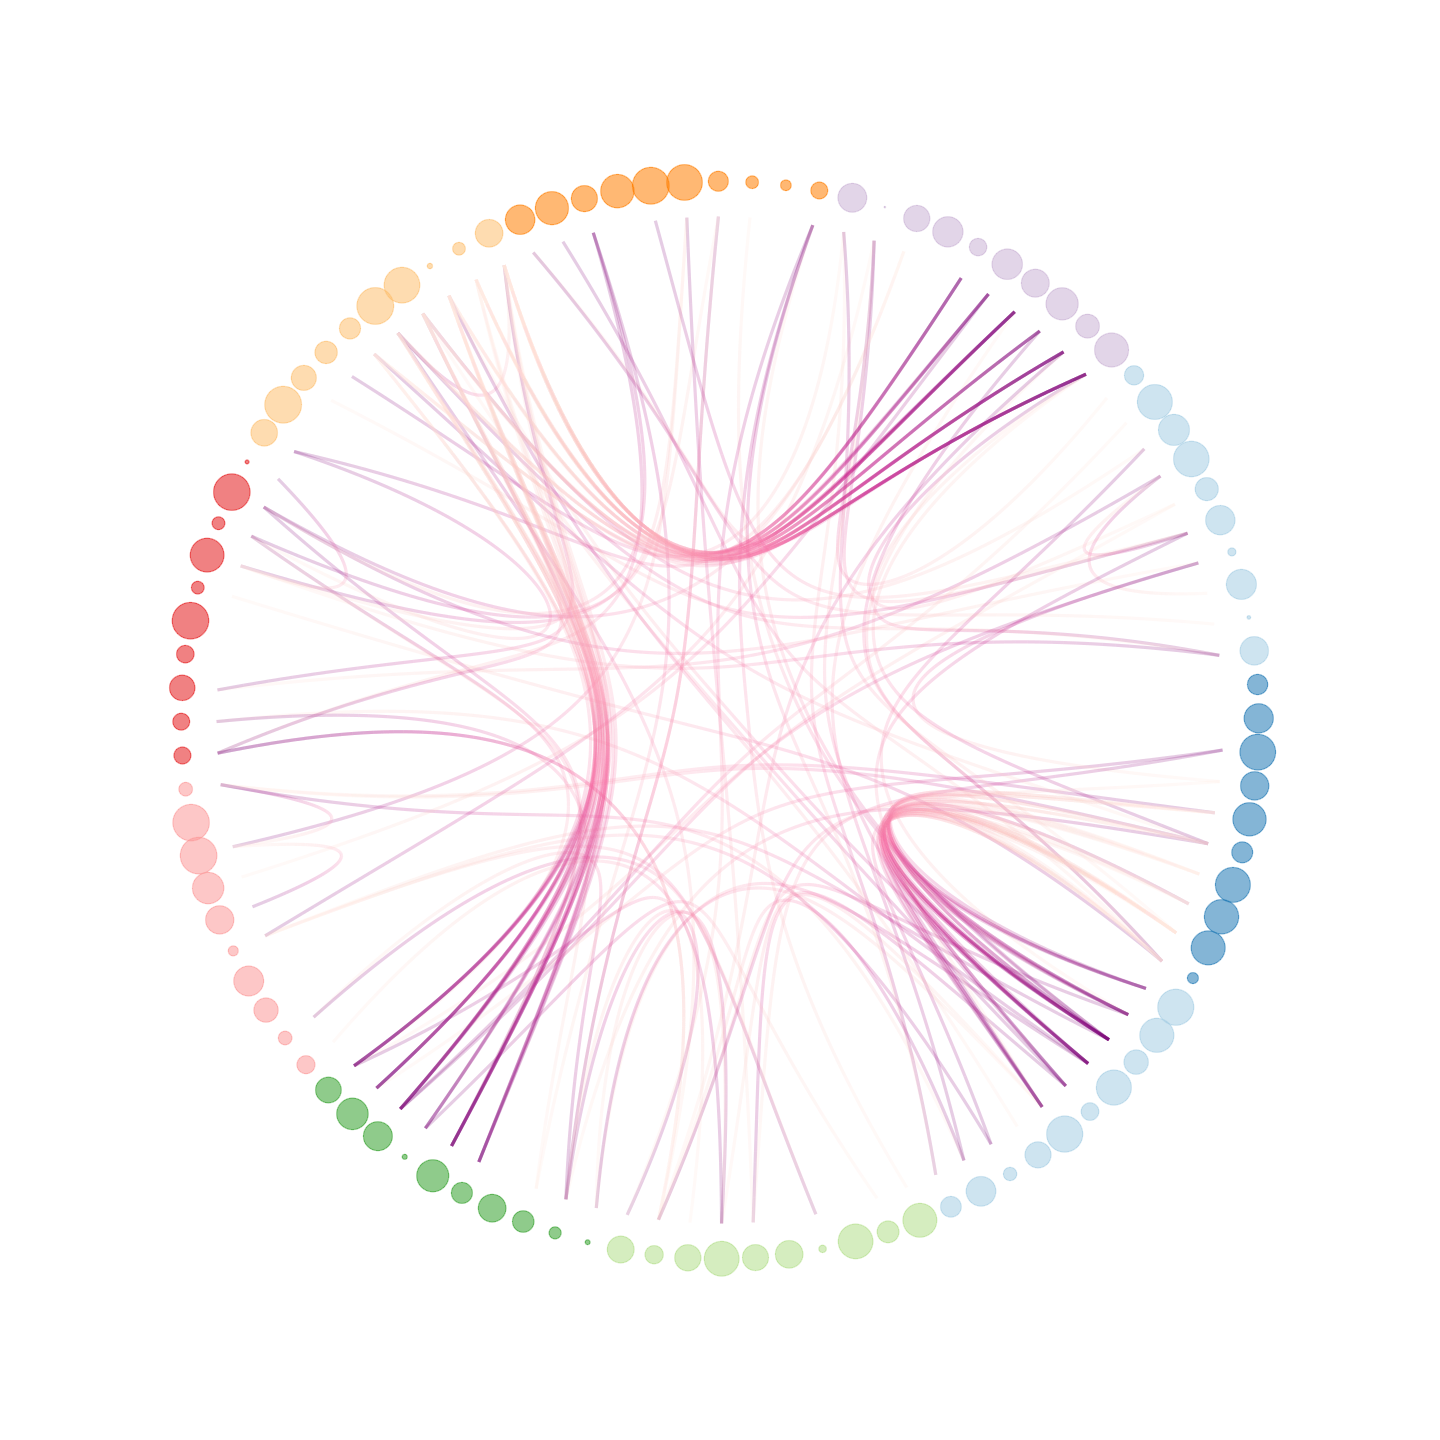

In [9]:
devtools::install_github("hrbrmstr/streamgraph")

Skipping install of 'streamgraph' from a github remote, the SHA1 (76f7173e) has not changed since last install.
  Use `force = TRUE` to force installation



In [27]:
# Library
library(streamgraph)
 
# Create data:
data <- data.frame(
  year=rep(seq(1990,2016) , each=10),
  name=rep(letters[1:10] , 27),
  value=sample( seq(0,1,0.0001) , 270)
)
 
# Basic stream graph: just give the 3 arguments
options(repr.plot.width = 8, repr.plot.height = 12)
pp <- streamgraph(data, key="name", value="value", date="year", height="300px", width="800px")
pp 

Warning message in widget_html(name = class(x)[1], package = attr(x, "package"), :
“streamgraph_html returned an object of class `list` instead of a `shiny.tag`.”


HTML widgets cannot be represented in plain text (need html)

In [7]:
install.packages("latticeExtra")

Installing package into ‘/home/lo/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’




Loading required package: lattice


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer




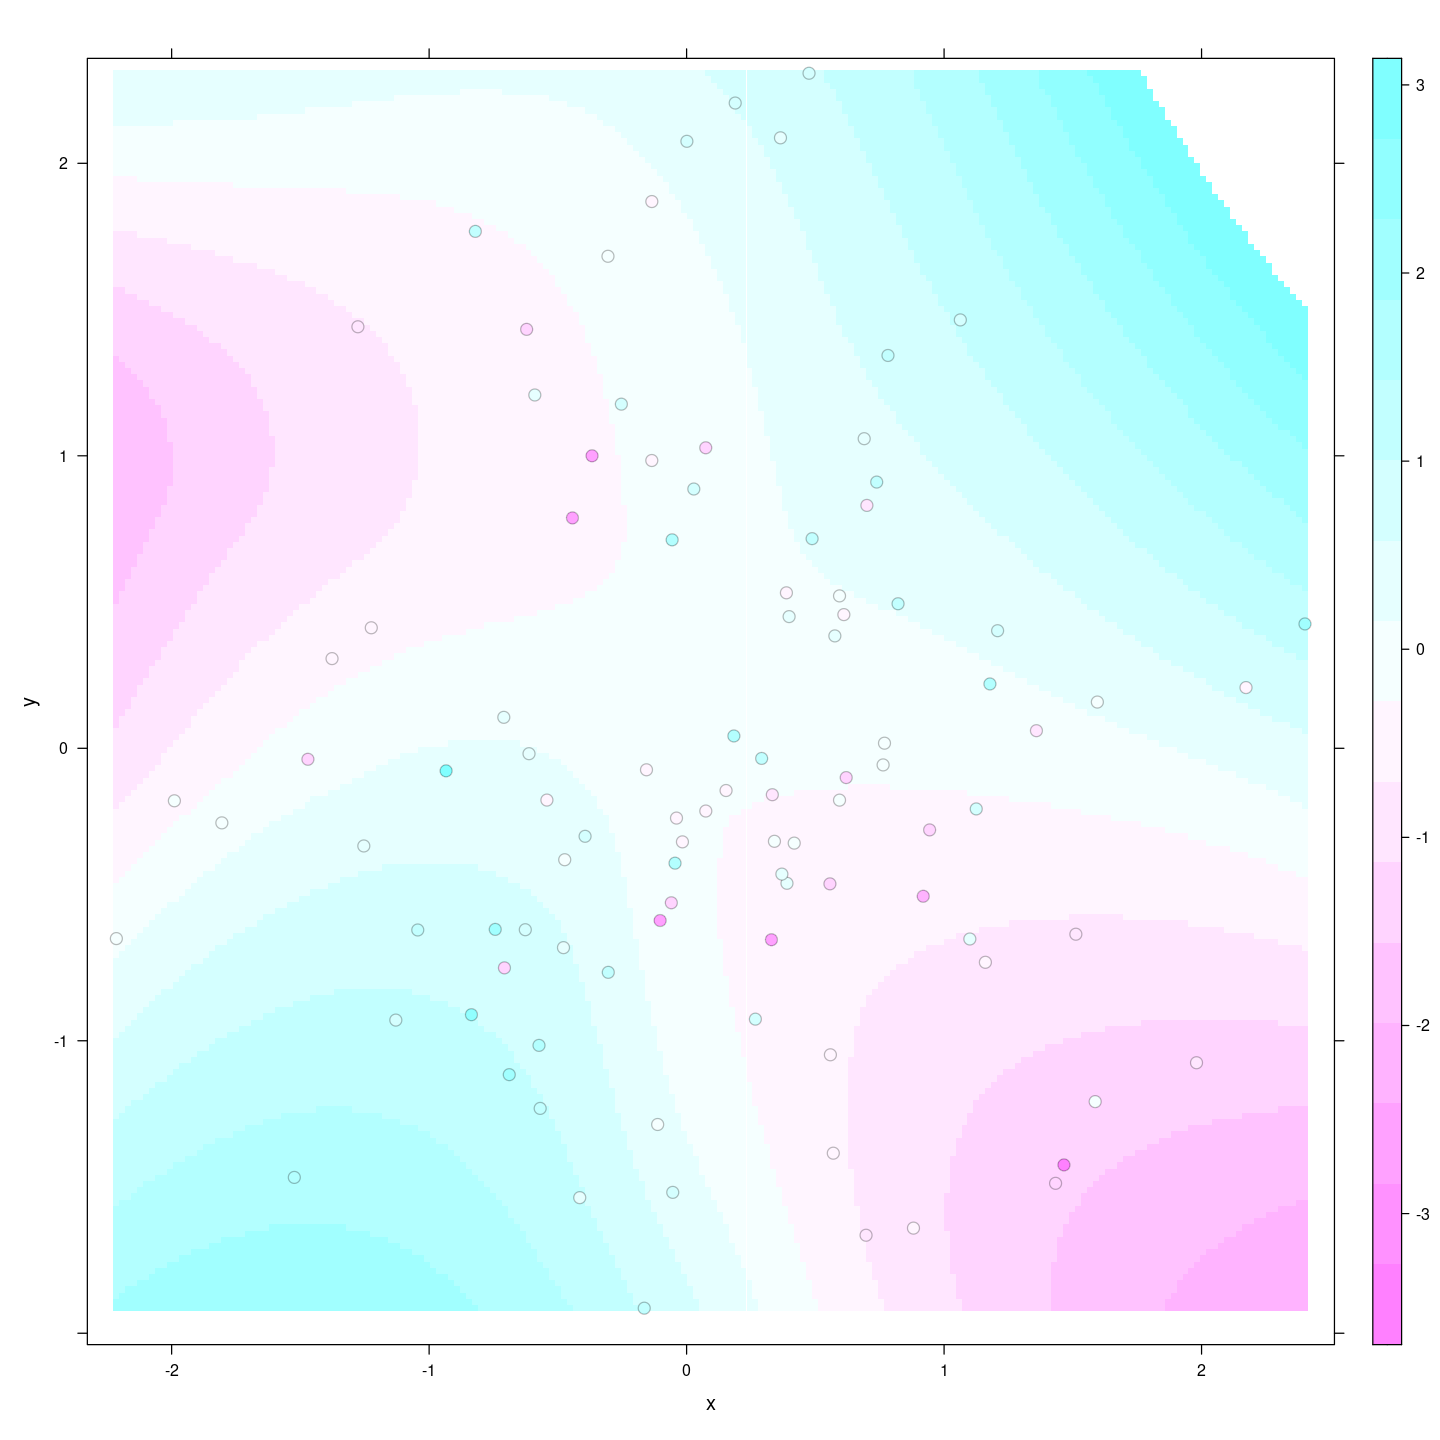

In [8]:
# library
library(latticeExtra) 
 
# create data
set.seed(1) 
data <- data.frame(x = rnorm(100), y = rnorm(100)) 
data$z <- with(data, x * y + rnorm(100, sd = 1)) 
 
# showing data points on the same color scale 
levelplot(z ~ x * y, data, 
          panel = panel.levelplot.points, cex = 1.2
    ) + 
    layer_(panel.2dsmoother(..., n = 200))

In [16]:
install.packages("broom")

Installing package into ‘/home/lo/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [17]:
# It is a new geospatial object: we can use all the usual techniques on it! Let's start with a basic ggplot2 chloropleth map:
library(tidyverse)
library(broom)
spdf_fortified <- tidy(afr_cartogram)
spdf_fortified = spdf_fortified %>% left_join(. , afr_cartogram@data, by=c("id"="ISO3")) 
ggplot() +
  geom_polygon(data = spdf_fortified, aes(fill = POP2005, x = long, y = lat, group = group) , size=0, alpha=0.9) +
  coord_map() +
  theme_void()

# As seen before, we can do better with a bit of customization
library(viridis)
ggplot() +
  geom_polygon(data = spdf_fortified, aes(fill = POP2005/1000000, x = long, y = lat, group = group) , size=0, alpha=0.9) +
  theme_void() +
  scale_fill_viridis(name="Population (M)", breaks=c(1,50,100, 140), guide = guide_legend( keyheight = unit(3, units = "mm"), keywidth=unit(12, units = "mm"), label.position = "bottom", title.position = 'top', nrow=1)) +
  labs( title = "Africa 2005 Population" ) +
  ylim(-35,35) +
  theme(
    text = element_text(color = "#22211d"), 
    plot.background = element_rect(fill = "#f5f5f4", color = NA), 
    panel.background = element_rect(fill = "#f5f5f4", color = NA), 
    legend.background = element_rect(fill = "#f5f5f4", color = NA),
    plot.title = element_text(size= 22, hjust=0.5, color = "#4e4d47", margin = margin(b = -0.1, t = 0.4, l = 2, unit = "cm")),
    legend.position = c(0.2, 0.26)
  ) +
  coord_map()

ERROR: Error in value[[3L]](cond): Package ‘broom’ version 0.7.9 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘broom’ is imported by ‘tidyverse’, ‘modelr’ so cannot be unloaded



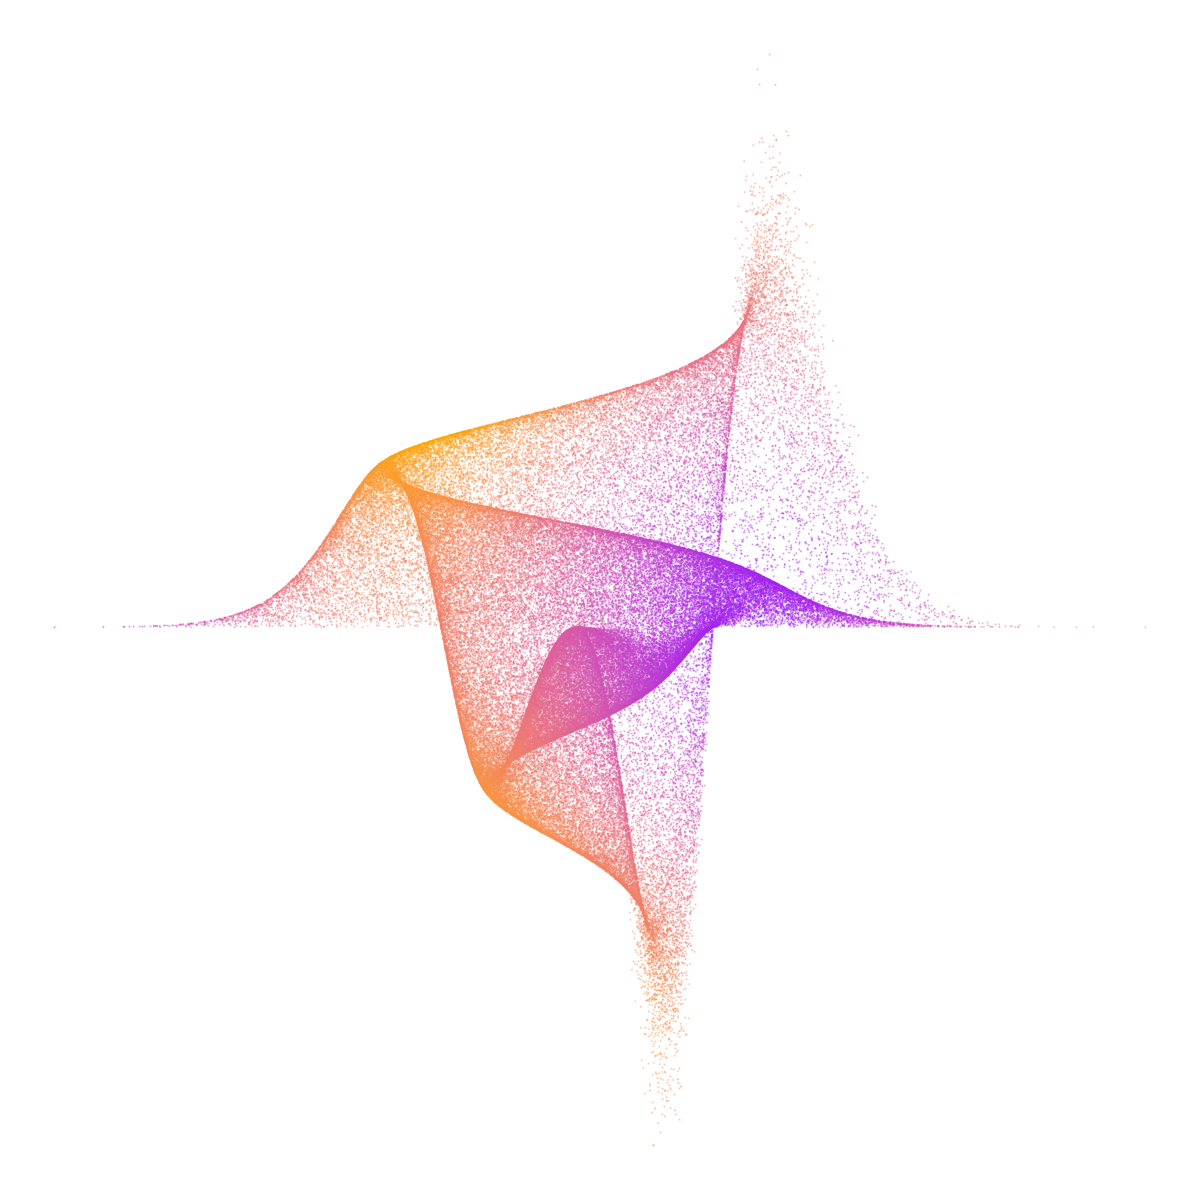

In [38]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 10)

moxbuller = function(n) {   
    u = runif(n)   
    v = runif(n)   
    x = cos(2*pi*u)*sqrt(-2*log(v))  
    y = sin(2*pi*v)*sqrt(-2*log(u))
    r = data.frame(x=x, y=y)
    return(r) 
}
r = moxbuller(100000)

ggplot(data = r, aes(x, y)) + 
    geom_jitter(aes(color = sin(x) + cos(y)), alpha = 0.3, size = 0.01) +
    theme_void() +
    theme(legend.position = "none") + 
    scale_colour_gradient(low = "orange", high = "purple", aesthetics = "colour")

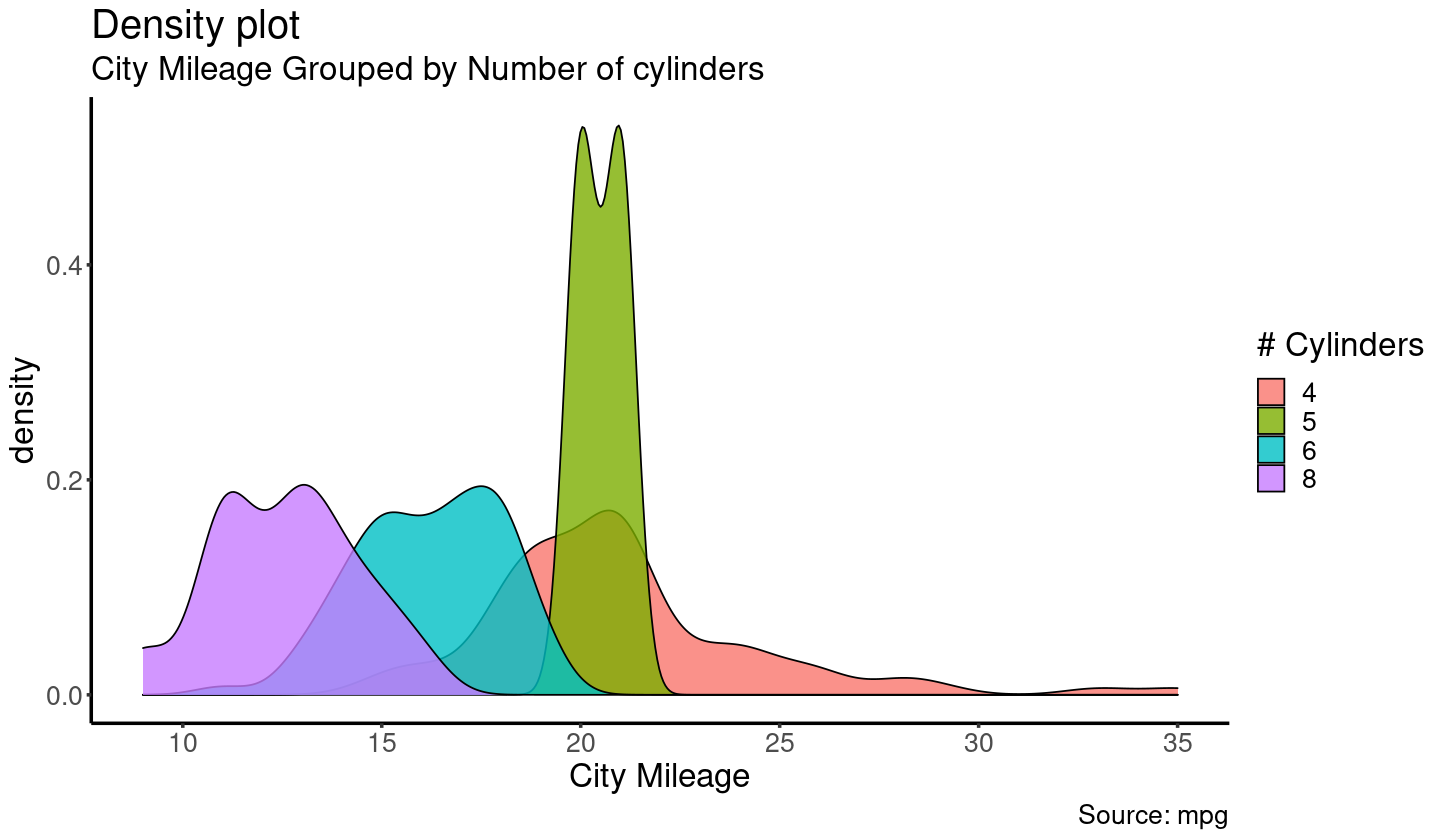

In [10]:
library(ggplot2)
theme_set(theme_classic())

# Plot
options(repr.plot.width = 12, repr.plot.height = 7)
g <- ggplot(mpg, aes(cty))
g + geom_density(aes(fill=factor(cyl)), alpha=0.8) + 
    theme(text = element_text(size = 20), element_line(size = 1)) +
    labs(title="Density plot", 
         subtitle="City Mileage Grouped by Number of cylinders",
         caption="Source: mpg",
         x="City Mileage",
         fill="# Cylinders")

# Example taken from: http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html